# Ejercicio 1

In [78]:
library(stats)
library(cluster)
install.packages('e1071')
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

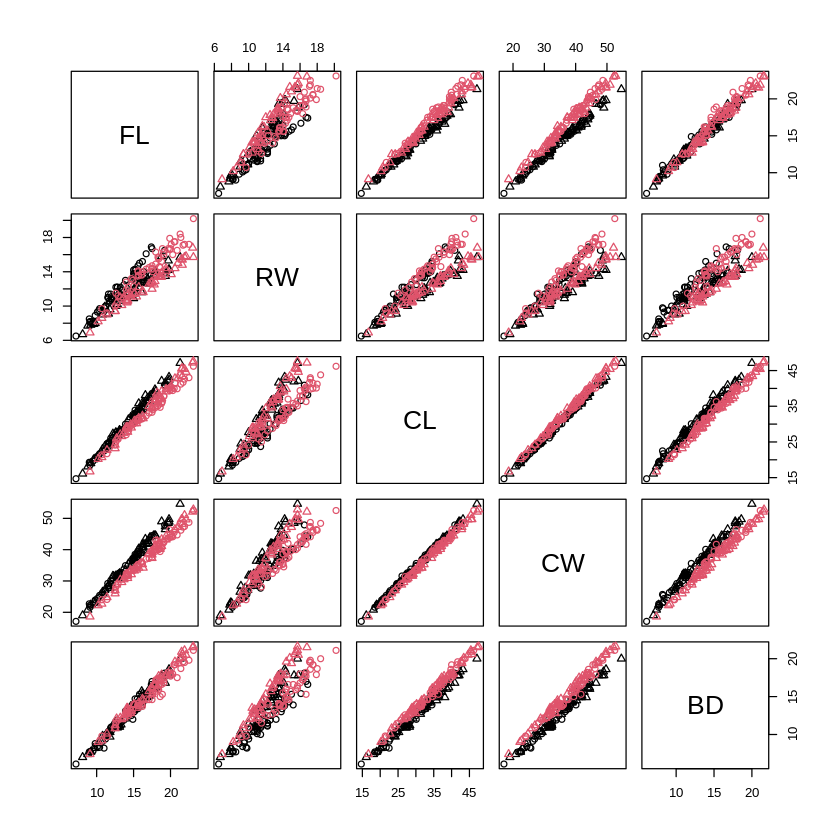

In [79]:
library(MASS)
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))

In [80]:
cluster_compare = function(default, cc) {
  #hago una tabla de confusion para comparar
  cont.table <- table(default,cc)
  print(cont.table)
  # Find optimal match between the two classifications
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  # Print the confusion table, with rows permuted to maximize the diagonal
  print(cont.table[,class.match])
}

In [81]:
datos = crabs[,4:8]
datos.log = log(datos)
datos.log.scaled = scale(datos.log)
datos.log.scaled.pca = prcomp(datos.log.scaled)
datos.log.scaled.pca.scaled = scale(datos.log.scaled.pca$x)

In [82]:
km.cc = kmeans(datos, 2, nstart=25)
km.cc.log = kmeans(datos.log, 2, nstart=25)
km.cc.log.scaled = kmeans(datos.log.scaled, 2, nstart=25)
km.cc.log.scaled.pca = kmeans(datos.log.scaled.pca$x, 2, nstart=25)
km.cc.log.scaled.pca.scaled = kmeans(datos.log.scaled.pca.scaled, 2, nstart=25)

In [83]:
cluster_compare(crabs[,1], km.cc$cluster)
cluster_compare(crabs[,1], km.cc.log$cluster)
cluster_compare(crabs[,1], km.cc.log.scaled$cluster)
cluster_compare(crabs[,1], km.cc.log.scaled.pca$cluster)
cluster_compare(crabs[,1], km.cc.log.scaled.pca.scaled$cluster)

       cc
default  1  2
      B 61 39
      O 43 57
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 59 %
       cc
default  1  2
      B 61 39
      O 43 57
       cc
default  1  2
      B 52 48
      O 73 27
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
       cc
default  2  1
      B 48 52
      O 27 73
       cc
default  1  2
      B 48 52
      O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
       cc
default  1  2
      B 48 52
      O 27 73
       cc
default  1  2
      B 48 52
      O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
       cc
default  1  2
      B 48 52
      O 27 73
       cc
default   1   2
      B   0 100
      O 100   0
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 100 %
       cc
default   2   1
      B 100   0
      O   0 100


In [84]:
cluster_compare(crabs[,2], km.cc$cluster)
cluster_compare(crabs[,2], km.cc.log$cluster)
cluster_compare(crabs[,2], km.cc.log.scaled$cluster)
cluster_compare(crabs[,2], km.cc.log.scaled.pca$cluster)
cluster_compare(crabs[,2], km.cc.log.scaled.pca.scaled$cluster)

       cc
default  1  2
      F 53 47
      M 51 49
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
       cc
default  1  2
      F 53 47
      M 51 49
       cc
default  1  2
      F 64 36
      M 61 39
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
       cc
default  1  2
      F 64 36
      M 61 39
       cc
default  1  2
      F 36 64
      M 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
       cc
default  2  1
      F 64 36
      M 61 39
       cc
default  1  2
      F 36 64
      M 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
       cc
default  2  1
      F 64 36
      M 61 39
       cc
default  1  2
      F 50 50
      M 50 50
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50 %
       cc
default  1  2
  

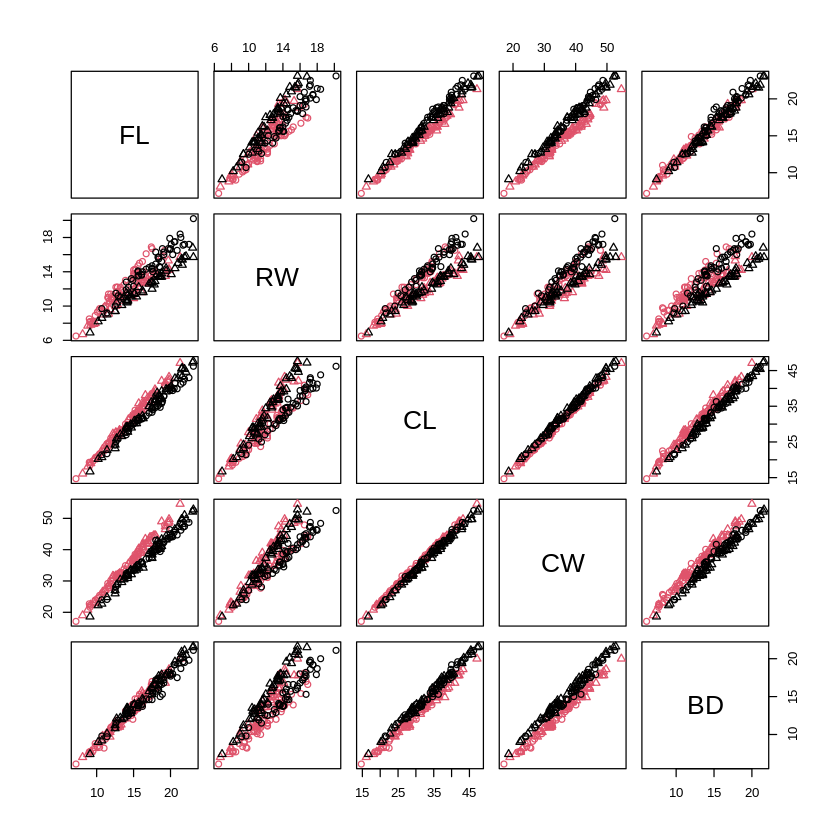

In [85]:
plot(datos,col=km.cc.log.scaled.pca.scaled$cluster,pch=as.numeric(crabs[,2]))

Despues de mover muchas veces los datos con `log`, `scale` y `prcromp` podemos ver como al volver a escalar los datos despues de aplicar pca obtenemos que los cluster matchean un 100% con la clase `SP`. Pero tambien se puede ver que esto no funciona tan bien cuando comparamos los cluster con la clases `SEX`

In [86]:
datos.pca = prcomp(datos)
# datos.pca.scaled = scale(datos.pca$x)

hc.cc = hclust(dist(datos), method="average")

hc.cc.pca = hclust(dist(datos.pca$x), method="average")
# hc.cc.pca.scaled = hclust(dist(datos.pca.scaled), method="average")

hc.cc.log = hclust(dist(datos.log), method="average")
hc.cc.log.scaled = hclust(dist(datos.log.scaled), method="average")
hc.cc.log.scaled.pca = hclust(dist(datos.log.scaled.pca$x), method="average")
hc.cc.log.scaled.pca.scaled = hclust(dist(datos.log.scaled.pca.scaled), method="average")


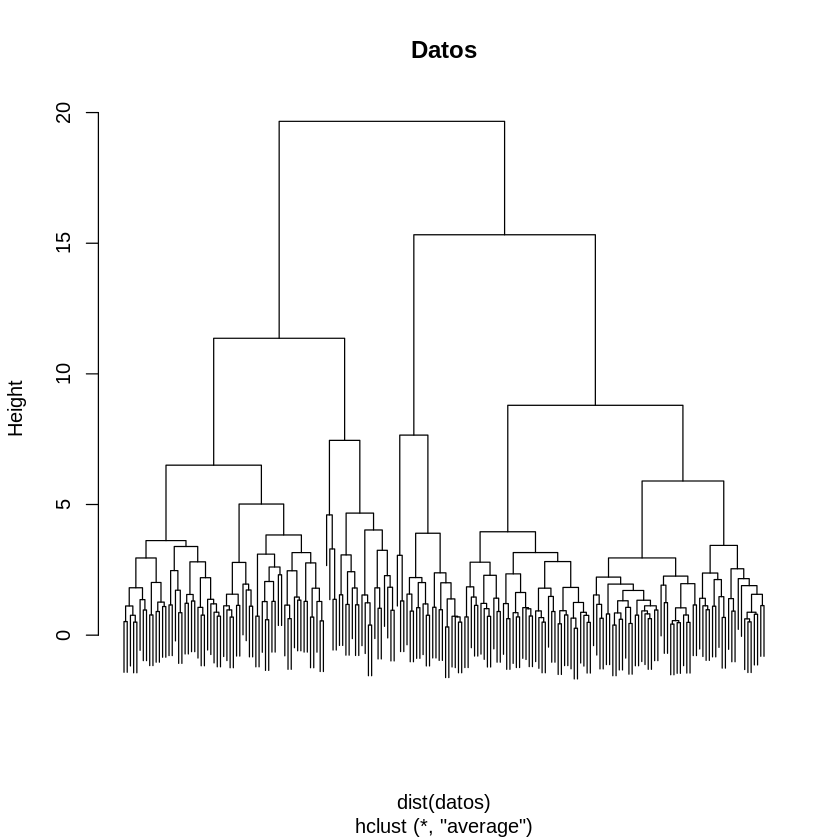

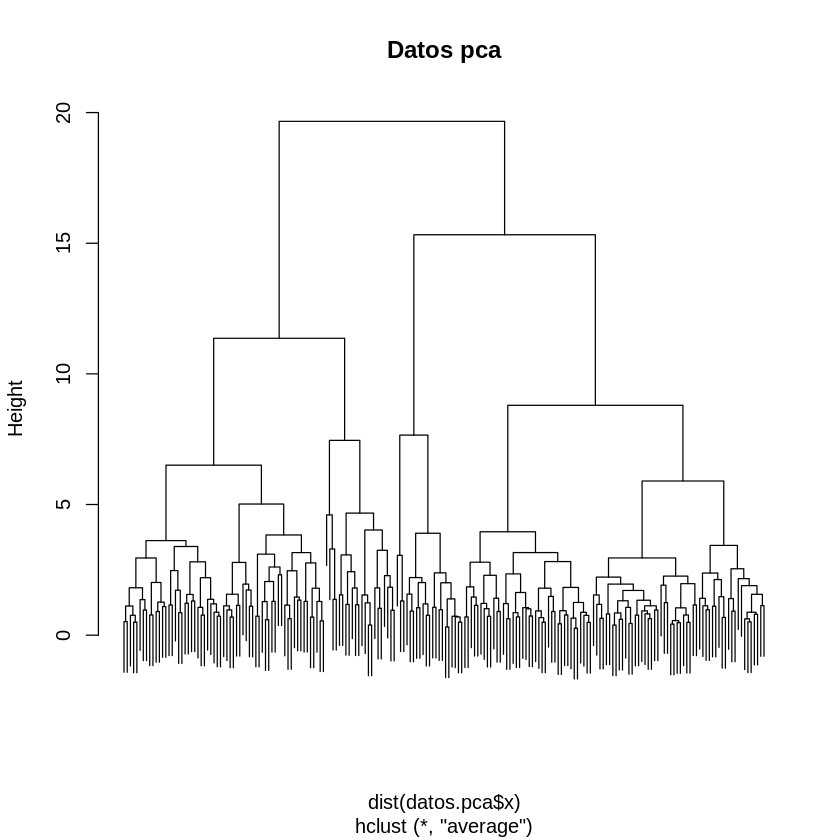

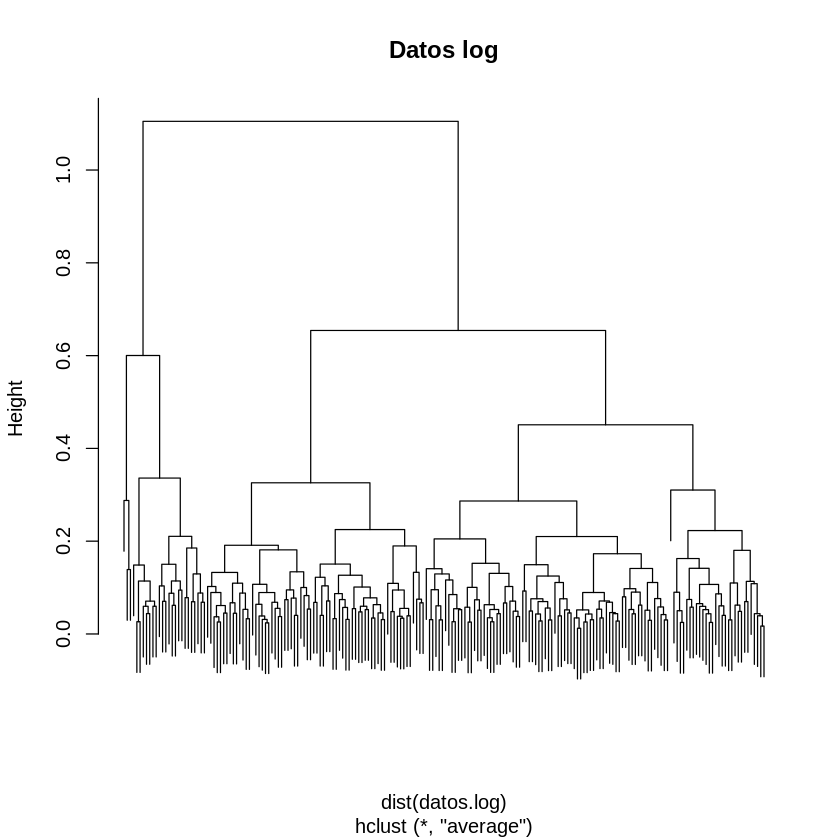

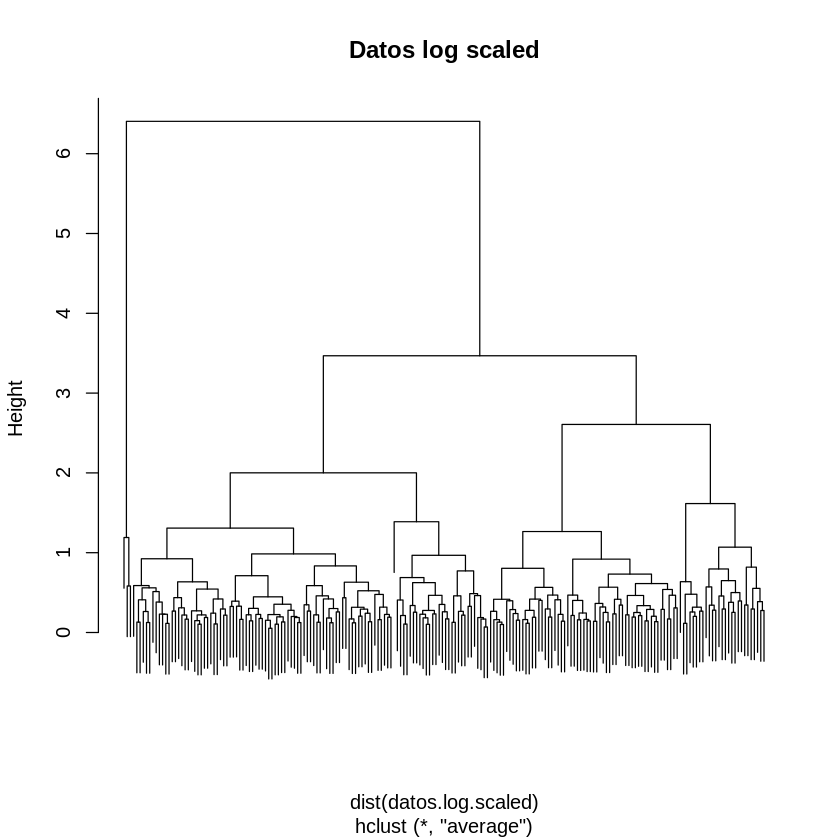

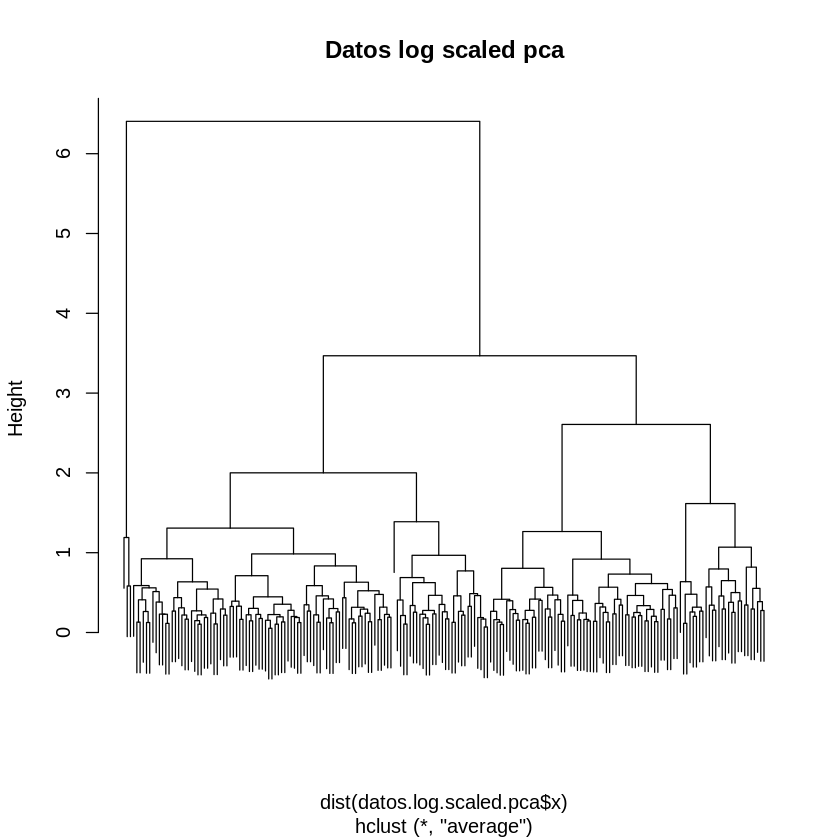

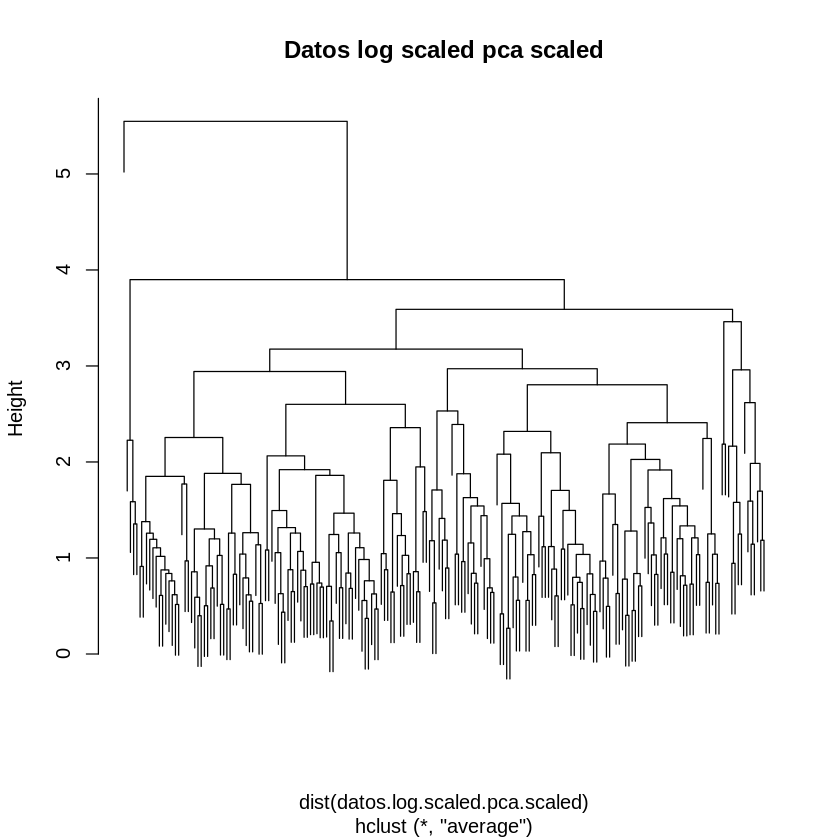

In [87]:
plot(hc.cc, main="Datos", labels = FALSE)

plot(hc.cc.pca, main="Datos pca", labels = FALSE)
# plot(hc.cc.pca.scaled, main="Datos pca scaled")

plot(hc.cc.log, main="Datos log", labels = FALSE)
plot(hc.cc.log.scaled, main="Datos log scaled", labels = FALSE)
plot(hc.cc.log.scaled.pca, main="Datos log scaled pca", labels = FALSE)
plot(hc.cc.log.scaled.pca.scaled, main="Datos log scaled pca scaled", labels = FALSE)

Ya viendo el plot de los cluster jerarquicos, podemos ver que los mejores resultados los vamos a obtener utilizando los datos crudos o aplicando `prcromp`

In [88]:
c.hc.cc = cutree(hc.cc, k=2)
c.hc.cc.pca = cutree(hc.cc.pca, k=2)
c.hc.cc.log = cutree(hc.cc.log, k=2)
c.hc.cc.log.scaled = cutree(hc.cc.log.scaled, k=2)
c.hc.cc.log.scaled.pca = cutree(hc.cc.log.scaled.pca, k=2)
c.hc.cc.log.scaled.pca.scaled = cutree(hc.cc.log.scaled.pca.scaled, k=2)

print("Datos")
cluster_compare(crabs[,1], c.hc.cc)
print("Datos pca")
cluster_compare(crabs[,1], c.hc.cc.pca)
print("Datos log")
cluster_compare(crabs[,1], c.hc.cc.log)
print("Datos log scaled")
cluster_compare(crabs[,1], c.hc.cc.log.scaled)
print("Datos log scaled pca")
cluster_compare(crabs[,1], c.hc.cc.log.scaled.pca)
print("Datos log scaled pca scaled")
cluster_compare(crabs[,1], c.hc.cc.log.scaled.pca.scaled)

[1] "Datos"
       cc
default  1  2
      B 69 31
      O 46 54
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 61.5 %
       cc
default  1  2
      B 69 31
      O 46 54
[1] "Datos pca"
       cc
default  1  2
      B 69 31
      O 46 54
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 61.5 %
       cc
default  1  2
      B 69 31
      O 46 54
[1] "Datos log"
       cc
default  1  2
      B 20 80
      O  6 94
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 57 %
       cc
default  1  2
      B 20 80
      O  6 94
[1] "Datos log scaled"
       cc
default  1  2
      B  2 98
      O  1 99
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
       cc
default  1  2
      B  2 98
      O  1 99
[1] "Datos log scaled pca"
       cc
default  1  2
      B  2 98
      O  1 99
Direct agreement: 0 of 2 pairs
I

In [89]:
print("Datos")
cluster_compare(crabs[,2], c.hc.cc)
print("Datos pca")
cluster_compare(crabs[,2], c.hc.cc.pca)
print("Datos log")
cluster_compare(crabs[,2], c.hc.cc.log)
print("Datos log scaled")
cluster_compare(crabs[,2], c.hc.cc.log.scaled)
print("Datos log scaled pca")
cluster_compare(crabs[,2], c.hc.cc.log.scaled.pca)
print("Datos log scaled pca scaled")
cluster_compare(crabs[,2], c.hc.cc.log.scaled.pca.scaled)

[1] "Datos"
       cc
default  1  2
      F 63 37
      M 52 48
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.5 %
       cc
default  1  2
      F 63 37
      M 52 48
[1] "Datos pca"
       cc
default  1  2
      F 63 37
      M 52 48
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.5 %
       cc
default  1  2
      F 63 37
      M 52 48
[1] "Datos log"
       cc
default  1  2
      F 14 86
      M 12 88
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51 %
       cc
default  1  2
      F 14 86
      M 12 88
[1] "Datos log scaled"
       cc
default  1  2
      F  1 99
      M  2 98
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
       cc
default  2  1
      F 99  1
      M 98  2
[1] "Datos log scaled pca"
       cc
default  1  2
      F  1 99
      M  2 98
Direct agreement: 0 of 2 pairs
I

Como vimos, en ambos casos, aplicar `hclust` con los datos crudos o despues de aplicar `prcromp` son los que mejor resultados dieron. Tambien hay que notar que con estos datos, es mejor usar `kmeans` ya que obtuvimos un match del 100%

Algo que se vio en ambos algoritmos, los cluster que encuentra siempre suelen matchear mejor con las clases de especies que las clases de sexo, no estoy encontrando el causante de esto. Supongo que las variables, separan mas a las especies que al sexo del cangrejo

# Ejercicio 1 b

In [94]:
load("/content/lampone.Rdata")
lampone.vars = lampone[,- c(1,143,144)]
summary(lampone[,c(1,143)])

lampone.vars.pca = prcomp(lampone.vars)$x
lampone.vars.pca.scaled = scale(lampone.vars.pca)
# Aplicar log a los datos nos lleva a tener valores NaN

   anno    N_tipo 
 2006:19   2 :22  
 2007:30   10:27  

Podemos ver que en ambas columnas tenemos solo 2 clases, por lo que vamos a buscar encontrar 2 clusters

In [15]:
km.lc = kmeans(lampone.vars, 2)
km.lc.pca = kmeans(lampone.vars.pca, 2)
km.lc.pca.scaled = kmeans(lampone.vars.pca.scaled, 2)

In [16]:
print('Datos')
cluster_compare(lampone[,1], km.lc$cluster)
cluster_compare(lampone[,143], km.lc$cluster)
print('Datos pca')
cluster_compare(lampone[,1], km.lc.pca$cluster)
cluster_compare(lampone[,143], km.lc.pca$cluster)
print('Datos pca scaled')
cluster_compare(lampone[,1], km.lc.pca.scaled$cluster)
cluster_compare(lampone[,143], km.lc.pca.scaled$cluster)

[1] "Datos"
       cc
default  1  2
   2006  2 17
   2007 28  2
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
       cc
default  2  1
   2006 17  2
   2007  2 28
       cc
default  1  2
     2  12 10
     10 18  9
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
       cc
default  2  1
     2  10 12
     10  9 18
[1] "Datos pca"
       cc
default  1  2
   2006  2 17
   2007 28  2
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
       cc
default  2  1
   2006 17  2
   2007  2 28
       cc
default  1  2
     2  12 10
     10 18  9
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
       cc
default  2  1
     2  10 12
     10  9 18
[1] "Datos pca scaled"
       cc
default  1  2
   2006 18  1
   2007 29  1
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 61.22 %
       cc
default  2  1
   2006  1 18
   2007 

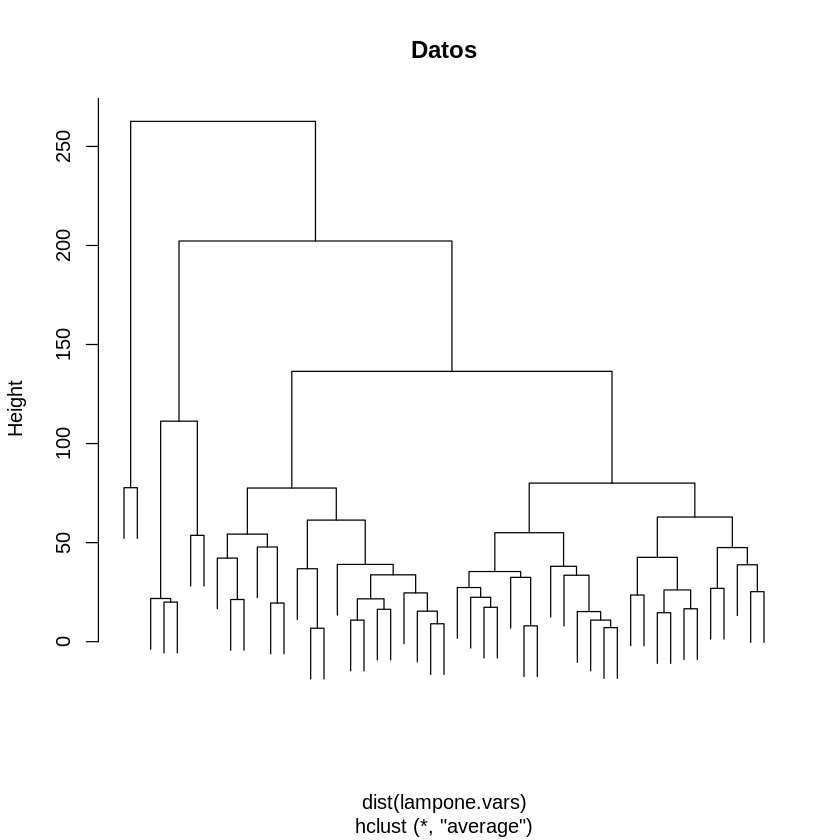

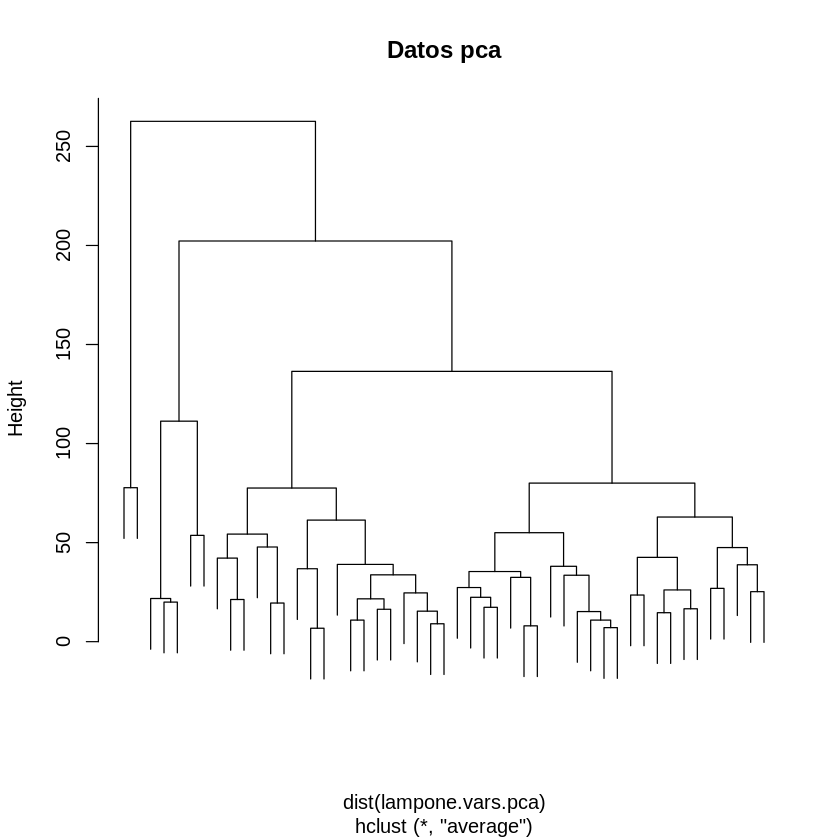

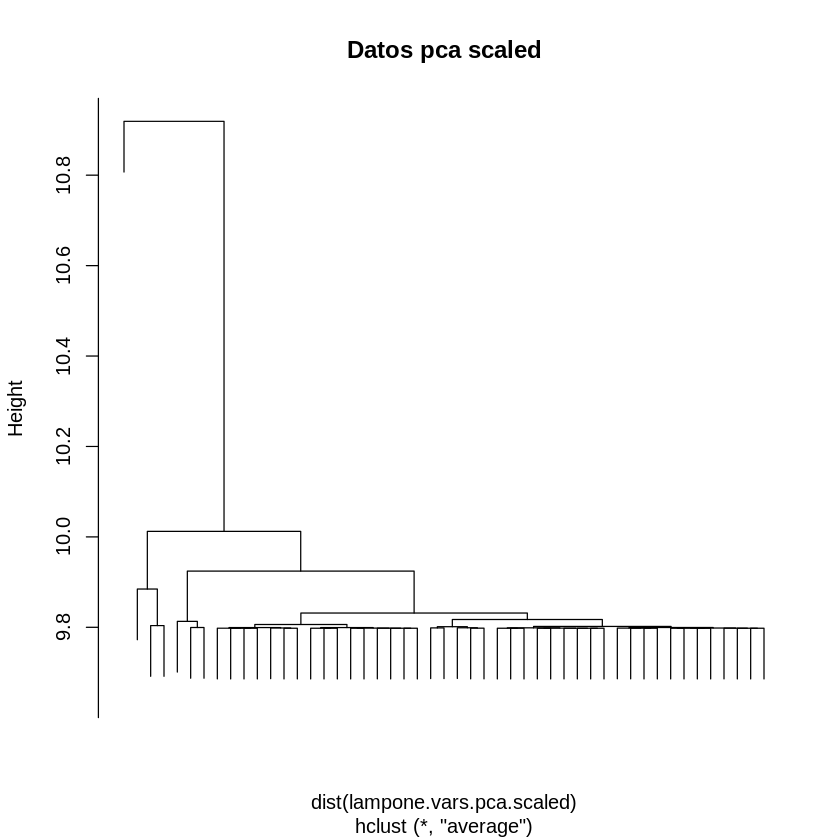

In [17]:
hc.lc = hclust(dist(lampone.vars), method="average")
hc.lc.pca = hclust(dist(lampone.vars.pca), method="average")
hc.lc.pca.scaled = hclust(dist(lampone.vars.pca.scaled), method="average")

plot(hc.lc, main="Datos", labels = FALSE)
plot(hc.lc.pca, main="Datos pca", labels = FALSE)
plot(hc.lc.pca.scaled, main="Datos pca scaled", labels = FALSE)

Podemos ver que por los plot, aplicar `pca` y `scale` no mejor mucho el rendimiento y puedo prever que no vamos a tener buenos resultados

In [18]:
c.hc.lc = cutree(hc.lc, k=2)
c.hc.lc.pca = cutree(hc.lc.pca, k=2)
c.hc.lc.pca.scaled = cutree(hc.lc.pca.scaled, k=2)

print('Datos')
cluster_compare(lampone[,1], c.hc.lc)
cluster_compare(lampone[,143], c.hc.lc)
print('Datos pca')
cluster_compare(lampone[,1], c.hc.lc.pca)
cluster_compare(lampone[,143], c.hc.lc.pca)
print('Datos pca scaled')
cluster_compare(lampone[,1], c.hc.lc.pca.scaled)
cluster_compare(lampone[,143], c.hc.lc.pca.scaled)

[1] "Datos"
       cc
default  1  2
   2006 18  1
   2007 29  1
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 61.22 %
       cc
default  2  1
   2006  1 18
   2007  1 29
       cc
default  1  2
     2  21  1
     10 26  1
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 55.1 %
       cc
default  2  1
     2   1 21
     10  1 26
[1] "Datos pca"
       cc
default  1  2
   2006 18  1
   2007 29  1
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 61.22 %
       cc
default  2  1
   2006  1 18
   2007  1 29
       cc
default  1  2
     2  21  1
     10 26  1
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 55.1 %
       cc
default  2  1
     2   1 21
     10  1 26
[1] "Datos pca scaled"
       cc
default  1  2
   2006 18  1
   2007 30  0
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 


Como dije antes, los resultados no fueron tan buenos. Y para este dataset, los resultados fueron mejores para `kmeans` que en uno de los cluster con los datos crudos o con `pca` obtuvo un resultado de 91.84%

# Ejercicio 2


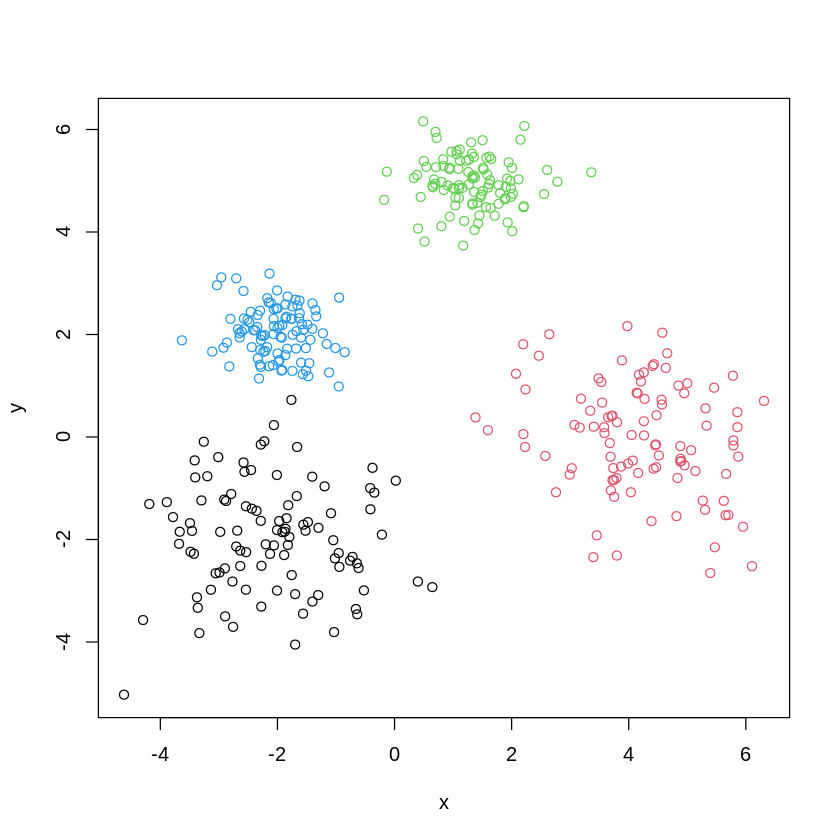

In [62]:
gaussian = function() {
    #cuatro clusters de dist. gaussianas
    tot.puntos<-100
    gap=2
    x<-rnorm(tot.puntos,mean=-gap)
    y<-rnorm(tot.puntos,mean=-gap)
    gausianas<-cbind(x,y,rep(1,length(x)))
    x<-rnorm(tot.puntos,mean=2*gap)
    y<-rnorm(tot.puntos,mean=0)
    gausianas<-rbind(gausianas,cbind(x,y,rep(2,length(x))))
    x<-rnorm(tot.puntos,mean=0.7*gap,sd=0.5)
    y<-rnorm(tot.puntos,mean=2.5*gap,sd=0.5)
    gausianas<-rbind(gausianas,cbind(x,y,rep(3,length(x))))
    x<-rnorm(tot.puntos,mean=-gap,sd=0.5)
    y<-rnorm(tot.puntos,mean=gap,sd=0.5)
    gausianas<-rbind(gausianas,cbind(x,y,rep(4,length(x))))
    plot(gausianas[,1:2],col=gausianas[,3])

    return (gausianas)
}

gausianas = gaussian()

In [19]:
gap.statistic = function(data, K, B) {
  
  gap = function(k, B, v.W.k, W.k) {
    res = 0
    for (b in 1:B) {
      res = res + (log(v.W.k[b]) - log(W.k))
    }
    return (res/B)
  }

  standar.dev = function(B, v.W.k) {
    l = 0
    for (b in 1:B) {
      l = l + log(v.W.k[b])
    }
    l = l/b

    sd.k = 0
    for (b in 1:B) {
      sd.k = sd.k + (log(v.W.k[b]) - l)^2
    }
    sd.k = sqrt(sd.k/B)
    return (sd.k)
  }

  generate.uniform.dataset = function(dataset) {
    n.row = nrow(dataset)
    n.col = ncol(dataset)
    dataset.pca = prcomp(dataset, scale=TRUE)

    dataset.uniform = c()
    for (c in 1:n.col) {
        dataset.uniform = c(dataset.uniform, runif(n.row, min(dataset.pca$x[,c]), max(dataset.pca$x[,c])))
    }

    dataset.uniform = matrix(dataset.uniform, nrow=n.row, ncol=n.col)
    return(dataset.uniform)
  }

  v.W.k = c()
  prev.GAP.k = NULL

  for (k in 2:(K+1)) {
    km = kmeans(data, k)
    W.k = km$tot.withinss

    for (b in 1:B) {
      d.uniform = generate.uniform.dataset = (data)
      u.km = kmeans(d.uniform, k)
      v.W.k = c(v.W.k, u.km$tot.withinss)
    }

    # Calculamos el GAP
    GAP.k = gap(k, B, v.W.k, W.k)
    sd.k = standar.dev(B, v.W.k)
    sk = sd.k * sqrt(1+(1/B))

    if (!is.null(prev.GAP.k)) {
      if (prev.GAP.k >= (GAP.k - sk)) {
        print("[Terminado] K encontrado")
        print(k-1)
        return (k-1)
      }
    }
    prev.GAP.k = GAP.k
  }

  print("[Terminado] K default")
  print(2)
  return (2)
}

In [27]:
lampone.gap = gap.statistic(lampone.vars, 10, 500)

[1] "[Terminado] K encontrado"
[1] 5


In [22]:
iris.gap = gap.statistic(iris[,-5], 10, 500)

[1] "[Terminado] K encontrado"
[1] 9


In [129]:
gausianas.gap = gap.statistic(gausianas[,-3], 10, 500)

[1] "[Terminado] K encontrado"
[1] 5


Con este algoritmo, no encontramos nunca el valor real de `k` para los cluster que hay en nuestro dataset. Este algoritmo lo corri varias veces y estos son los valores que mas dieron en cada dataset. Tengo que destacar que el segundo valor que mas salio en el dataset `lampone` y `iris` fue 2, que es la cantidad de clases que tenemos en estos problemas. 

In [137]:
estabilidad = function(data, K, r) {
    est.score = function(n, ind1, ind2, cc1, cc2) {
        #pongo los clusters de nuevo en longitud n - quedan 0 los puntos fuera del sample
        v1<-v2<-rep(0,n)
        v1[ind1]<-cc1
        v2[ind2]<-cc2
        #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada
        # clustering
        a<-sqrt(v1%*%t(v1))
        m1<-a / -a + 2*(a==round(a))
        m1[is.nan(m1)]<-0
        a<-sqrt(v2%*%t(v2))
        m2<-a / -a + 2*(a==round(a))
        m2[is.nan(m2)]<-0
        #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
        validos<-sum(v1*v2>0)
        score<-sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
        return (score)
    }

    n.row = nrow(data)
    r.samples.index = list()
    for (i in 1:r) {
        r.samples.index[[i]] = sample(n.row, n.row * .8)
    }

    k.scores = c()
    for (k in 2:K) {
        km.r.samples = list()
        for (i in 1:r) {
            km.r.samples[[i]] = kmeans(data[r.samples.index[[i]],], k, nstart=25)$cluster
        }
        
        scores = c()
        for (i in 1:(r-1)) {
            for (j in (i+1):r) {
                scores = c(scores, est.score(n.row, r.samples.index[[i]], r.samples.index[[j]], km.r.samples[[i]], km.r.samples[[j]]))
            }
        }

        k.scores = c(k.scores, mean(scores))
    }

    return (list(scores=k.scores, best.k=which.max(k.scores)+1))
}

In [133]:
lampone.est = estabilidad(lampone.vars, 10, 15)
lampone.est

$scores
[1] 0.8807556 0.9398272 0.8105529 0.7698321 0.8190607 0.8493795 0.8151591
[8] 0.7812047 0.8531019

$best.k
[1] 3

In [108]:
iris.est = estabilidad(iris[,-5], 10, 15)
iris.est

$scores
[1] 1.0000000 0.9765339 0.7909067 0.8522016 0.8937697 0.8963489 0.8530123
[8] 0.7940652 0.8271719

$best.k
[1] 2

In [111]:
gausianas.est = estabilidad(gausianas[,-3], 10, 15)
gausianas.est

$scores
[1] 1.0000000 1.0000000 0.7768370 0.8601824 0.8690857 0.9003186 0.8565601
[8] 0.7798224 0.8079176

$best.k
[1] 2

Con este algoritmo no logramos obtener la cantidad de cluster correcta salvo con el dataset `iris`. Una cosa para notar, en el problema de las 4 gausianas `k=2` y `k=3` tienen el mismo score, pero nosotros siempre queremos el menor k posible.

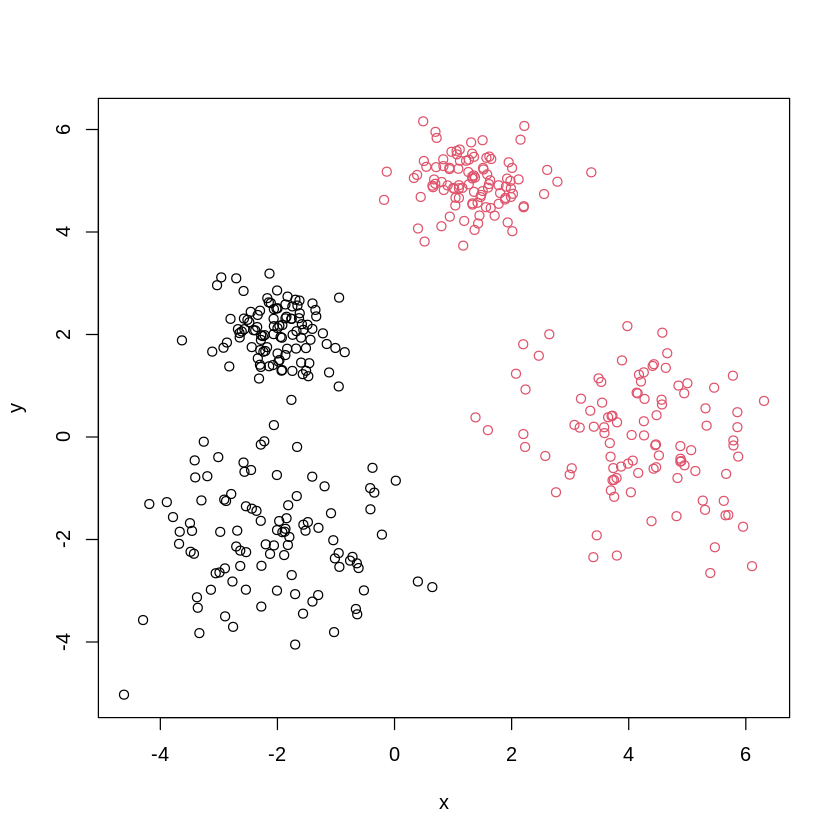

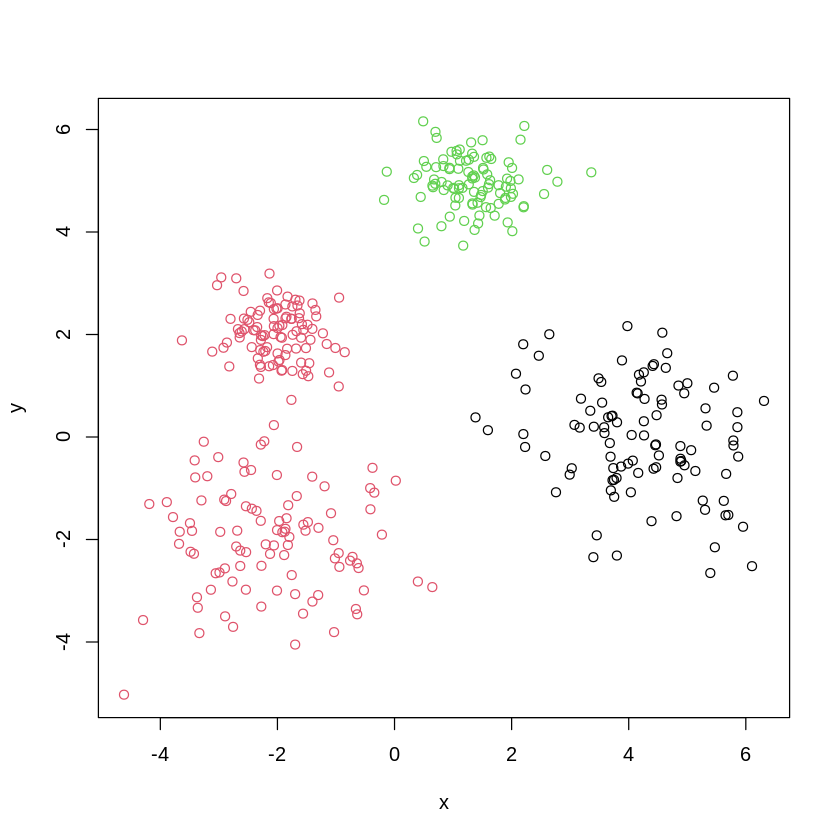

In [128]:
km.gc = kmeans(gausianas[,-3], 2)
plot(gausianas[,-3], col=km.gc$cluster)

km.gc = kmeans(gausianas[,-3], 3)
plot(gausianas[,-3], col=km.gc$cluster)

Queria ver como seria el resultado de obtener 2 y 3 cluster en el problema de las gausianas ya que ambos valores tuvieron el mismo valor